### Задание 1

In [1]:
import pandas as pd

In [2]:
groups = pd.read_csv('groups.csv', delimiter=';')
active = pd.read_csv('active_studs.csv')
checks = pd.read_csv('checks.csv', delimiter=';')

In [3]:
groups.head(3) #A - контроль (осталась база), В - целевая;

,id,grp
0,1206794,B
1,331024,B
2,1733498,A


In [4]:
active.head(3) #зашли в день эксперимента;

,student_id
0,581585
1,5723133
2,3276743


In [5]:
checks.head(3) #заплатили в день эксперимента;

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0


Для анализа нам необходимы не все данные пользователи, а только те, которые заходили на сайт. Для удобства я разделила активных пользователей на две таблицы в зависимости от их группы.

In [6]:
def get_active_id(group):
    d = {}
    d['student_id'] = []
    for index, row in groups.iterrows():
        if row['id'] in active['student_id'].tolist() and row['grp'] == group:
            d['student_id'].append(row['id'])
    return(d)

In [7]:
A_students = get_active_id('A')

In [8]:
A_students = pd.DataFrame(A_students)
A_students.head(3)

,student_id
0,938570
1,470877
2,3038687


In [9]:
B_students = get_active_id('B')

In [10]:
B_students = pd.DataFrame(B_students)
B_students.head(3)

,student_id
0,946259
1,1896859
2,4808409


In [11]:
def add_payment(df):
    rev = []
    for index, row in df.iterrows():
        if row['student_id'] in checks['student_id'].tolist():
            a = checks.loc[checks['student_id'] == row['student_id']]['rev']
            i = checks.index[checks['student_id'] == row['student_id']]
            rev.append(a[i[0]])
        else:
            rev.append(0.0)
    df['rev'] = rev
    return df

In [12]:
A_students = add_payment(A_students)

In [13]:
A_students.head(3)

,student_id,rev
0,938570,0.0
1,470877,0.0
2,3038687,0.0


In [14]:
B_students = add_payment(B_students)

In [15]:
B_students.head(3)

,student_id,rev
0,946259,0.0
1,1896859,0.0
2,4808409,0.0


Для общего представления посмотрим на размер обоих таблиц, чтобы понимать, сколько активных пользователей было в день эксперимента.

In [16]:
len(A_students)

1538

In [17]:
len(B_students)

6803

Дальше посмотрим, какую суммарную прибыль принесла каждая из групп.

In [18]:
sum(A_students['rev'])

72820.0

In [19]:
sum(B_students['rev'])

394974.00350000017

Далее узнаем размер среднего платежа людей в двух группах.

In [20]:
sum(A_students['rev']) /len(A_students.loc[A_students['rev'] != 0.0])

933.5897435897435

In [21]:
sum(B_students['rev']) /  len(B_students.loc[B_students['rev'] != 0.0])

1257.8789920382171

In [22]:
1456.4 / 1257.8789920382171

1.1578220235955348

Предположение подтвердилось. Оплата среднего человека в целевой группе больше, чем в контрольной на ~20%.

На основе имеющихся данных можно подсчитать, какой процент активных пользователей каждой из групп в принципе совершили платёж.

In [23]:
 len(A_students.loc[A_students['rev'] != 0.0]) / len(A_students) * 100

5.071521456436931

In [24]:
 len(B_students.loc[B_students['rev'] != 0.0]) / len(B_students) * 100

4.615610759958842

Если опираться только на имеющиеся данные, то можно сделать вывод, что новая механика оплаты имеет положительный экономический эффект. Средний платёж пользователя из целевой группы больше, пользователи доверяют новой механике и готовы переводить крупные суммы, используя новый интерфейс.
Чек среднего пользователя вырос на ~20% с введением новой механики.

Как можно увидеть, самый крупный платёж совершил пользователь из целевой группы.

In [32]:
print(max(A_students['rev']))
#print(min(A_students.loc[A_students['rev'] != 0.0]['rev']))
print(max(B_students['rev']))
#print(min(B_students.loc[B_students['rev'] != 0.0]['rev']))

3660.0
4650.0


Однако на количестве оплативших людей введение новой механики не оказало большоего влияния (конверсия 5% в группе А и ~4,6% в группе В).

На основе имеющихся данных нельзя сделать однозначный вывод, так как, по моему мнению, не хватает некоторых сведений, которые могли бы оказаться статистически значимыми и конкретезировать выборки. В ходе эксперимента нужно учитывать, является ли произведённый платёж для пользователя первым, или пользователь уже является постоянным. Возможно, есть взаимосвязь с продуктом, который оплачивает пользователь (это может объяснить, почему % людей из группы А, которые произвели оплату, выше, но средняя сумма платежа выше в группы В).

### Задание 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.DataFrame({'x': range(1,11), 'y': np.random.randn(10), 'c': np.random.randn(10)})

In [3]:
df

,c,x,y
0,-1.126619,1,0.029547
1,1.429290,2,-1.073840
2,-0.480009,3,-0.742315
3,0.159162,4,-1.582609
4,0.449817,5,-0.173009
5,0.076570,6,1.224604
6,1.084203,7,-0.524175
7,-0.057345,8,1.401658
8,0.158328,9,0.464223
9,-0.131979,10,-1.342186


In [4]:
class BaseGraph:
    
    def __init__(self, data, title, x_label, y_label):
        """Constructor"""
        self.data = data
        self.title = title
        self.x_label = x_label
        self.y_label = y_label
    
    def plot(self, x, y):
        plt.plot(x, y, data=self.data)
        plt.title(self.title)
        plt.xlabel(self.x_label)
        plt.ylabel(self.y_label)
        plt.show()
        return

In [5]:
my_plot = BaseGraph(df, 'Оценка чего-то', 'количество чего-то', 'вероятность чего-то')

C:\Users\1\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3363: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


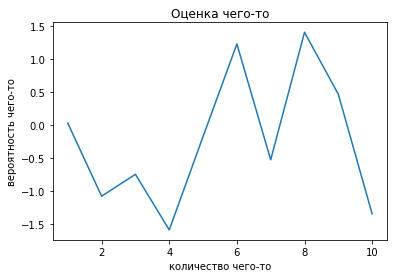

In [6]:
my_plot.plot('x', 'y')

In [7]:
class BarGraph(BaseGraph):
    
    def plot(self, x, y):
        plt.bar(x, y, data=self.data)
        plt.title(self.title)
        plt.xlabel(self.x_label)
        plt.ylabel(self.y_label)
        plt.show()
        return

In [8]:
my_barplot = BarGraph(df, 'Оценка чего-то', 'количество чего-то', 'вероятность чего-то')

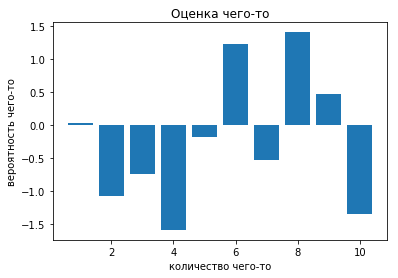

In [9]:
my_barplot.plot('x', 'y')